<center><h1><b>Real Or Not? NLP with disaster tweets</b></h1></center>

<center><h3>DSI206 Multimedia Representation Management</h3></center>

<center>Data Science and Innovation, College of Interdisciplinary Studies</center>

<center>Thammasat University, Thailand</center>

<br>

<center><h3>Kids With Code</h3></center>
<br><br>

# **Introduction**

ปัจจุบัน Twitter มีความสำคัญในการกระจายข่าวสารต่างๆ ให้คนทั่วไปได้รับข้อมูลทันเวลา โดยเฉพาะเรื่องภัยพิบัติธรรมชาติที่เกิดขึ้นบ่อยครั้ง แต่เนื่องด้วยคำบางคำที่แม้จะเป็นคำที่เกี่ยวข้องกับภัยพิบัติแต่อาจนำมาใช้ในเชิงเปรียบเทียบ ซึ่งทำให้บางโพสต์อาจมองว่าเป็นข้อความที่เกี่ยวข้องกับภัยพิบัติ ไม่ใช่สิ่งที่มนุษย์เห็นจากโพสต์นั้น เมื่อได้เห็นถึงปัญหาที่เกิดขึ้น จึงได้สนใจเข้าร่วมการแข่งขันนี้ในการทำนายข้อความจาก twitter ว่าเป็นข้อความที่เกี่ยวข้องกับภัยพิบัติหรือไม่ โดยใช้ dataset จาก kaggle ที่เตรียมไว้ให้
<br><br>
Today, Twitter is important in the distribution of news. Let the general public receive timely information. Especially about natural disasters that occur frequently. But as some terms, although they are related to disaster, may be used metaphorically. This makes some posts look like disaster-related messages, not what humans saw from that post.
<br><br>
When seeing the problems that arise. Therefore, I interested in participating in this competition to predict messages from twitter whether they are related to disaster or not, by using the dataset from Kaggle provided.

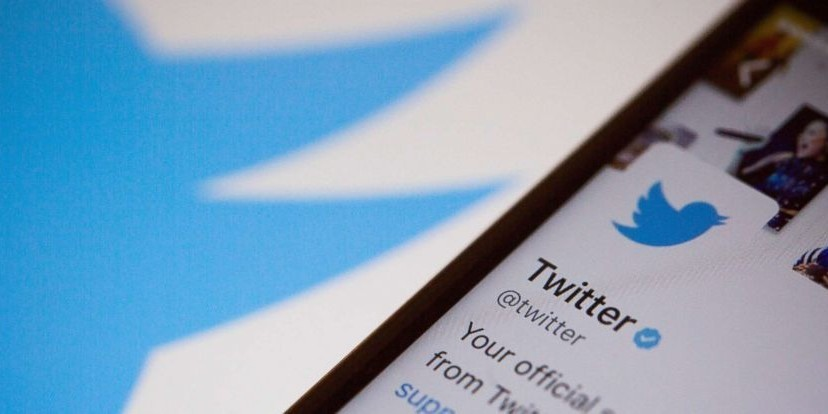

------------------------------------------------------------------------------------------------------

# **Dataset**

Dataset ที่ใช้ ประกอบด้วย 

1. train.csv ซึ่งมี Instances (ข้อความจาก Twitter) จำนวน 7,613 ข้อมูลและมี Attribute ดังต่อไปนี้
    * id : เลขลำดับ id ของผู้ใช้
    * keyword : คำเฉพาะในการทำนายที่เจอจาก Tweet
    * location : พิกัดของผู้ใช้งาน
    * text : ข้อความที่ผู้ใช้งานทำการโพสต์
    * target : ผลการทำนายว่าเป็นข้อความที่เกี่ยวข้องกับภัยพิบัติหรือไม่ (0 : ไม่เป็น, 1 : เป็น)

2. test.csv ซึ่งมี Instances (ข้อความจาก Twitter) จำนวน 3,263 ข้อมูลและมี Attribute ดังต่อไปนี้
    * id : เลขลำดับ id ของผู้ใช้
    * keyword : คำเฉพาะในการทำนาย
    * location : พิกัดของผู้ใช้งาน
    * text : ข้อความที่ผู้ใช้งานทำการโพสต์

3. sample_submission.csv ซึ่งจะทำการเก็บข้อมูล id และ target ที่ไว้ระบุว่าข้อความ ณ id นั้นเป็นข้อความที่เกี่ยวข้องกับภัยพิบัติหรือไม่

The dataset used contains

1. train.csv that has instances (texts from Twitter) 7,613 rows and atrributes
    * id : a unique identifier of user
    * keyword : a particular word from the tweet
    * location : the location the tweet was sent from
    * text : the text of the tweet
    * target : this denotes whether a tweet is about a real disaster (1) or not (0)
    
2. test.csv that has instances (texts from Twitter) 3,263 rows and attributes
    * id : a unique identifier of user
    * keyword : a particular word from the tweet
    * location : the location the tweet was sent from
    * text : the text of the tweet
    
3. submission.csv : This will collect the id and target that indicates whether the message at the id is a disaster-related message or not.

ทางกลุ่มได้ทำการ import module สำคัญอย่าง <code>pandas</code> ที่ช่วยในการจัดการเกี่ยวกับตาราง และ <code>numpy</code> ที่ช่วยในการจัดการค่าต่างๆ รวมถึงการใช้ฟังก์ชันคำนวณต่างๆ และทำการเช็ค dataset ว่ามีไฟล์อะไรบ้าง โดยใช้ module <code>os</code> ดังโค้ดข้างล่าง

We have imported key modules like <code>Pandas</code> to help manage tables and <code>Numpy</code> to help manage values, including using various computational functions. And checking dataset what files are available, by using module <code>os</code> as code below.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')
train.head(10)

ทางกลุ่มได้สำรวจข้อมูลจาก dataset โดยใช้ <code>pd.count()</code> ในการดูจำนวนข้อมูลจากแต่ละ Attribute ซึ่งจะเห็นว่าในส่วนของ keyword และ location จะมีจำนวนน้อยกว่า attribute ตัวอื่นๆ เนื่องจากมีข้อมูลบางส่วนไม่มีการกำหนดค่าหรือใส่ข้อความแต่อย่างใด

We surveyed data from dataset by using <code>pd.count()</code> to look at the amount of data from each attribute. Which saw that the keyword and location parts were lower than other attributes because some of the data was not configured, or enter text in any way.

In [ ]:
train.count()

In [ ]:
test.count()

-----------------------------------------------------------------------------------------------------------

# **Data Cleaning**

เมื่อดึงไฟล์เก็บเข้าในตัวแปรแล้ว จึงทำการ cleaning ข้อมูลโดยใช้ module ต่อไปนี้

When the files are stored in variables, we performed data cleaning using the following modules.

In [ ]:
from nltk.corpus import stopwords
import re
import string

จากนั้นทำการสร้างฟังก์ชัน <code>change_contraction_verb</code> ในการเปลี่ยนแปลงตัวอักขระหรือคำบางคำที่เป็นตัวย่อให้กลายเป็นคำรูปแบบเต็ม โดยใช้ Regular Expression ในการดำเนินการกับข้อความในรูปแบบ string (ในที่นี้ใช้ <code>re.sub()</code> ในการเปลี่ยนคำ)

เมื่อสร้างฟังก์ชันแล้ว จึงทำการ apply กับตัวแปร train และ test ที่เก็บ dataset นั้น โดยใช้ <code>lambda</code> เข้ามาช่วยในการทำฟังก์ชัน

Then, we created a function <code>change_contraction_verb</code> to convert some abbreviated characters or words to full words, use Regular Expression to manipulate text in the form of strings (In this case, we use <code>re.sub()</code>).

Once the function is created, we applied to the variables (train and test) that contain the dataset, and used <code>lambda</code> to perform the function.

In [ ]:
def change_contraction_verb(text):
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    return text

train['text'] = train['text'].apply(lambda x : change_contraction_verb(x))
test['text'] = test['text'].apply(lambda x : change_contraction_verb(x))

train['text'].head(10)

ทางกลุ่มได้ศึกษา Notebook code ชื่อ Getting started with NLP-Feature Vectors ของ parulpandey ในส่วนที่เป็น custom preprocessor ซึ่งช่วยในการตัดข้อความบางส่วนที่ไม่จำเป็นออกจาก dataset ทางกลุ่มจึงนำ code จากแหล่งที่มาดังกล่าวมาใช้ภายใต้ฟังก์ชัน <code>custom_preprocessor</code> ดังโค้ดข้างล่าง

We studied the Parulpandey's Getting started with NLP-Feature Vectors Notebook code as a custom preprocessor that eliminated some unnecessary text from the dataset.

We used it under the function <code>custom_preprocessor</code> as the code below.

In [ ]:
def custom_preprocessor(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

train['text'] = train['text'].apply(lambda x : custom_preprocessor(x))
test['text'] = test['text'].apply(lambda x : custom_preprocessor(x))

train['text'].head(10)

นอกจากนี้ทางกลุ่มยังได้ศึกษาการนำ emojis ออกจากข้อความ ซึ่งจะใช้ <code>re.compile()</code> ในการรวบรวม pattern ที่เกี่ยวข้องกับ emoji และ flags เก็บเข้าในตัวแปร <code>emoji_pattern</code> โดยสร้างเป็นฟังก์ชัน <code>remove_emoji</code> ซึ่งจะ return ข้อความที่มีการตัด emojis และ flags ออกแล้ว ดังโค้ดข้างล่าง

In addition, we also studied emojis removal from text, which uses <code>re.compile()</code> to compile emoji-related patterns and flags into a variable name <code>emoji_pattern</code>. And we create a function <code>remove_emoji</code> that will return the text with the emojis and flags removed, as in the code below.

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
train['text'] = train['text'].apply(lambda x : remove_emoji(x))
test['text'] = test['text'].apply(lambda x : remove_emoji(x))

จากนั้นทำการเช็คข้อมูลของทั้ง 2 datasets โดยใช้ <code>pd.head()</code> ในการแสดงข้อมูลซึ่งจะกำหนดเริ่มต้นที่ 5 แถวแรก

Then, we checked data from 2 datasets by using <code>pd.head()</code> to show data. Which starts at the first 5 rows.

In [ ]:
train.head(10)

In [ ]:
test.head(10)

# **Data Analyzing**

ทางกลุ่มได้ทำการ import module ชื่อ CountVectorizer ซึ่งเป็นวิธีที่ง่ายที่สุดที่ใช้ในการทำ feature extraction โดยแปลงชุดข้อความให้กลายเป็นเลขแล้วใส่ลงใน vector โดยการนับของคำที่ปรากฏอยู่บนข้อความเพื่อใส่ลงไปในแต่ละเวกเตอร์ จะแยกตามตำแหน่งของคำ ซึ่งวิธีการนี้ยังสามารถใส่จำนวนคำที่นับได้ลงไปในเวกเตอร์โดยตรง หรือสามารถถ่วงน้ำหนักโดยจำนวนคำทั้งหมดบนข้อความทั้งหมดก่อนใส่ลงไปในเวกเตอร์ก็ได้

โดยในฟังก์ชัน CountVectorizer มี parameter ที่ต้องใช้ในการวิเคราะห์ดังต่อไปนี้

* token_pattern : รูปแบบของ token ที่จะทำการวิเคราะห์
* ngram_range : กำหนดขอบเขตการเลือกคำที่ติดกัน n คำ ในที่นี้ใช้ทั้ง unigrams และ bigrams (ดูหนึ่งคำ และ สองคำที่ติดกัน) และให้ค่าความน่าจะเป็นของชุดคำที่เกิดขึ้นร่วมกัน
* stop_words : ตัวแปรในการตัดคำที่พบบ่อยในประโยคแต่ไม่สื่อถึงอะไร ซึ่งในที่นี้ใช้ตัวแปร stopwords ที่เก็บ list ของคำภาษาอังกฤษที่พบบ่อย

จากนั้นทำการ fit และ transform ให้กับข้อมูลใน attribute "text" ดังโค้ดข้างล่าง

We imported a module name CountVectorizer that is the simplest way for use to make the feature extraction. This method converts from text to numbers and put into vectors. By counting the words that appear on the text to enter into each vector, separated by word position.  This method can also insert the countable word count directly into the vector, or it can be weighted by the total number of words on all of the text before adding it to the vector.

In this function has parameters used to analyze, which contains

* token_pattern
* ngram_range : In this case, we used unigrams and bigrams
* stop_words : a variable used to wrap words often in sentences, but not to convey anything. In this case, we used a variable names <code>stopwords</code> that holds a list of common English words.

Then, fit and transform data in the attribute <code>"text"</code> as the code below.

In [ ]:
#Stopwords

from sklearn.feature_extraction.text import CountVectorizer

stopwords = stopwords.words('english')

print(stopwords)

In [ ]:
#CountVectorizer

count_vectorizer = CountVectorizer(token_pattern=r'\w{1,}', ngram_range=(1, 2), stop_words = stopwords)

train_vector = count_vectorizer.fit_transform(train['text'])
test_vector = count_vectorizer.transform(test['text'])

In [ ]:
train_vector.toarray()

จากนั้นทางกลุ่มได้ทำการหาค่าความแม่นยำของโมเดลโดยใช้ <code>cross_val_score</code> ซึ่งมี parameters ดังนี้

* clf : ตัวแปรที่เก็บฟังก์ชัน <code>LogisticRegression</code>
* train_vector : ตัวแปร list ที่จะทำการ fit 
* train\['target'\] : ตัวแปร list ที่จะทำนายจากการ learning
* cv : ตัวกำหนดการแบ่งข้อมูลเพื่อคำนวณค่าความแม่นยำหรือค่าความผิดพลาดจำนวน K รอบ (ในที่นี้ใช้ 5 รอบ)
* scoring : ตัวแสดงผลลัพธ์ที่ได้จากการ learning และทำนายออกมา ซึ่งจะใช้ accuracy ในการแสดงผลลัพธ์แต่ละ fold

แสดงผลดังโค้ดข้างล่าง

Then, we calculated the accuracy value by using <code>cross_val_score</code> which has parameters

* clf : a variable collected a function <code>LogisticRegression</code>
* train_vector : a list variable to be fit
* train\['target'\] : a list variable to predict from learning
* cv : divide data to learn and calculate the accuracy value or the error value of K cycles (In this case, we use 5 times)
* scoring : Indicator of learning and prediction results, which will use the accuracy.

Show the result as the code below.

โดยทางกลุ่มได้ใช้หลักการ K-Fold Cross Validation ซึ่งเป็นการแบ่งข้อมูลออกเป็น K ชุดเท่า ๆ กัน และทำการคำนวณหาค่าความแม่นยำหรือค่าความผิดพลาดจำนวน K รอบ โดยแต่ละรอบการคำนวณ ข้อมูลชุดหนึ่งจากข้อมูล K ชุดจะถูกเลือกออกมาเพื่อเป็นข้อมูลทดสอบ และข้อมูลอีก K-1 ชุดจะถูกใช้เป็นข้อมูลสำหรับการเรียนรู้

We used the K-Fold Cross Validation principle, which divides data into K sets evenly and calculate the accuracy value or the error values of K cycles. For each calculation cycles, One of the K-data sets is selected for testing. And the other K-1 sets used for learning.

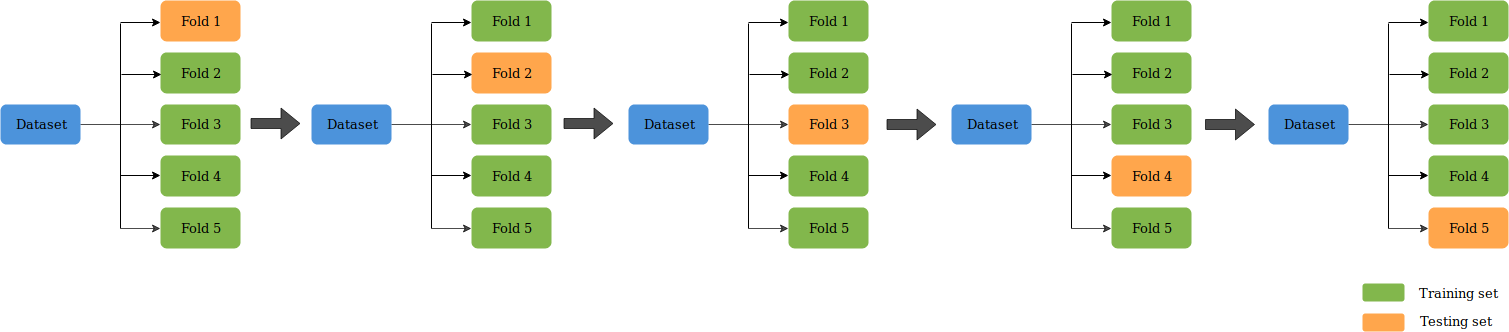

และทางกลุ่มได้เลือกใช้หลักการ Logistic Regression ซึ่งเป็นเทคนิคสถิติเชิงคุณภาพ ใช้ในการหาความสัมพันธ์ระหว่างตัวแปรอิสระกับตัวแปรตาม และพยากรณ์โอกาสที่จะเกิดเหตุการณ์ที่สนใจ ในที่นี้เป็นแบบทวิ (Binary) เนื่องจากตัวแปรตาม (target) มีเพียง 2 ค่าคือ 0 และ 1 โดย logistic regression สามารถคำนวณได้ตามสมการข้างล่าง

We used the Logistic Regression principle that is a qualitative statistic technique. It used to find the relationship between independent and dependent variables and predict the likelihood of an event of interest. In this case, it is binary. Since the dependent varaiable (target) has 2 values, 0 and 1. The logistic regression can be calculated according to the equation below.

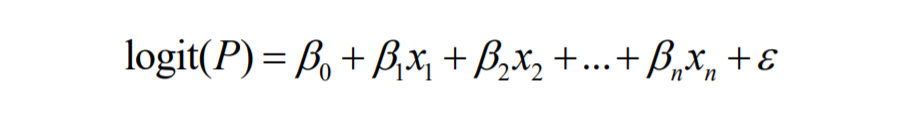

ซึ่งจากวิธีการข้างต้นจะได้ค่าความแม่นยำของโมเดลของแต่ละรอบการคำนวณ ซึ่งจากผลลัพธ์จะเห็นว่าในการ learning รอบที่ 5 มีความสามารถในการทำนายโมเดลสูงกว่า
รอบอื่นๆ และจากการหาค่าเฉลี่ยความแม่นยำของทุกกลุ่ม (fold) ซึ่งผลลัพธ์ที่ได้ เท่ากับ 70.76% ดังผลข้างล่าง อาจเป็นไปได้ว่าการสุ่มและทำนายครั้งนี้มีความแม่นยำในระดับหนึ่ง

Using the above method, the accuracy of the model for each calculation cycle is obtained. Which from the results, it can be seen that the fifth round of learning has a higher model prediction capability than the others. And calculating the mean of the accuracy of each fold that the result is 70.76%. It is possible that the fifth round of stunts and predictions have some degree of accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

clf = LogisticRegression()

#Check accuracy score from K-Fold cross validation
scores = model_selection.cross_val_score(clf, train_vector, train["target"], cv=5, scoring="accuracy")
print(scores)

In [ ]:
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is: ",scores.mean() * 100)

หลังจากนั้น ทำการ fit เข้ากับ <code>train_vector</code> และ คอลัมม์ target ใน <code>train</code>

After that, fit to <code>train_vector</code> and the column 'target' in <code>train</code>

In [ ]:
# Fitting a simple Logistic Regression on Counts
clf.fit(train_vector, train["target"])

# **Submission data**

เมื่อ fit เข้ากับ <code>train_vector</code> แล้วจึงทำการ predict กับ <code>test_vector</code> เก็บค่าที่ได้ลงในตาราง submission ในคอลัมม์ target จากนั้นอัพโหลดเข้าไฟล์ submission.csv เพื่อทำการส่งผลการทำนาย

Once it fits into <code>train_vector</code>. we predict to <code>test_vector</code>, store the result in the column 'target' of <code>submission</code> table. Then, upload it to the file <code>submission.csv</code> to submit predictions.

In [ ]:
# Submission
submission = pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
submission["target"] = clf.predict(test_vector)
submission.to_csv("submission.csv", index=False)

In [ ]:
submission.head(20)

หากมีความผิดพลาดประการใด ทางกลุ่มขออภัยมา ณ ที่นี้ด้วยครับ ขอบคุณครับ

If there is any mistake, we apologize here too. Thank you.

# **Reference**

* https://www.kaggle.com/parulpandey/getting-started-with-nlp-a-general-intro
* https://www.kaggle.com/parulpandey/getting-started-with-nlp-feature-vectors
* http://as.nida.ac.th/gsas/wp-content/uploads/2020/07/6110422045_%E0%B8%9B%E0%B8%8F%E0%B8%B4%E0%B8%8D%E0%B8%8D%E0%B8%B2-%E0%B8%AB%E0%B8%B1%E0%B8%AA%E0%B8%81%E0%B8%B8%E0%B8%A5.pdf (Thai)

# **Members**

1. นายปฏิภาณ รัตนาวิน | Patipan Rattanawin | 6209656187
2. นายพงศ์พล นิรามัย | PhongPhon Niramai | 6209656120
3. นางสาวณัฏฐนิช ดวงอาทิตย์ | Natthanit Duangarthit | 6209656492